In [1]:
!python --version

Python 3.13.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
cols =["areas","perimeter","compactness","length","width","asymmetry","groove","class"]
df = pd.read_csv("data_set/seeds_dataset.txt",sep="\s+",names=cols)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16816\3628030765.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("data_set/seeds_dataset.txt",sep="\s+",names=cols)


In [17]:
df.head()

,areas,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


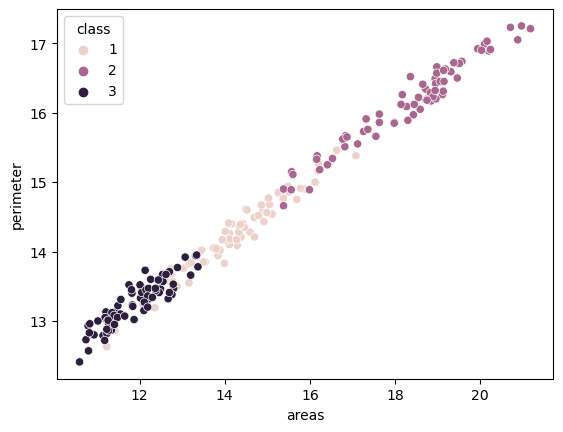

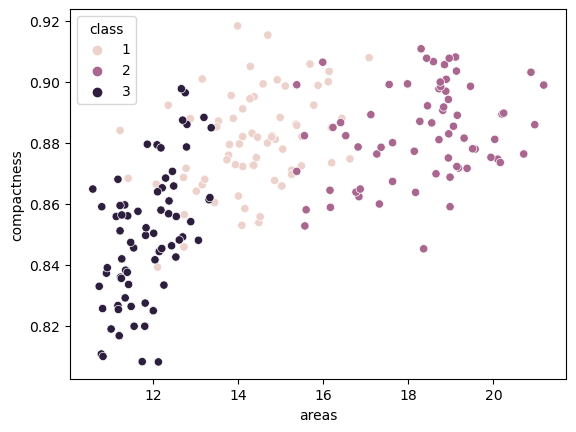

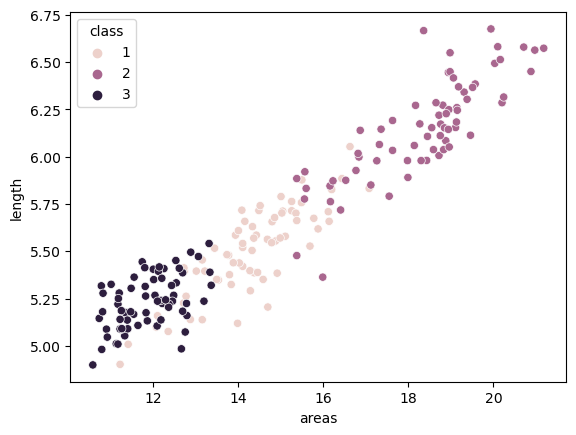

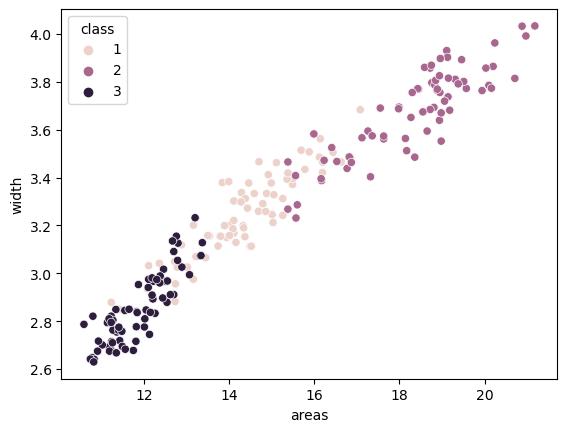

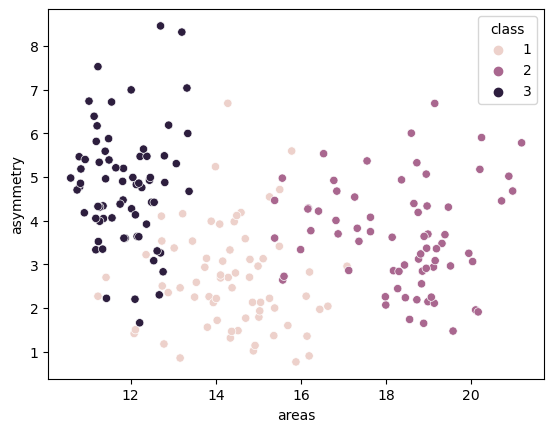

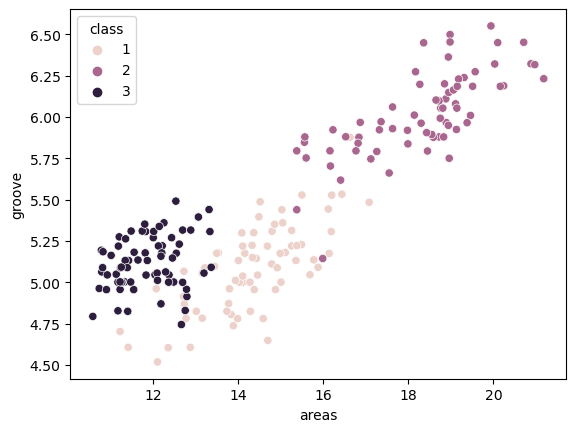

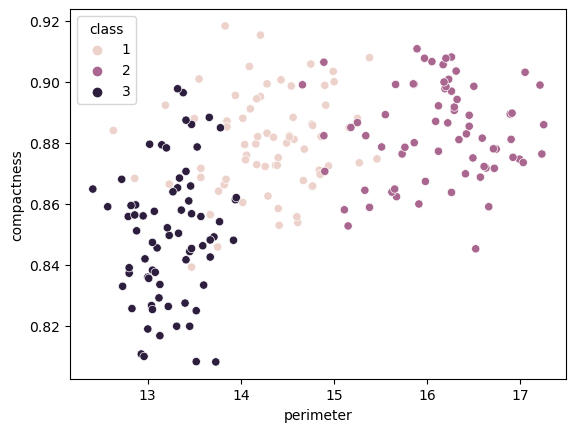

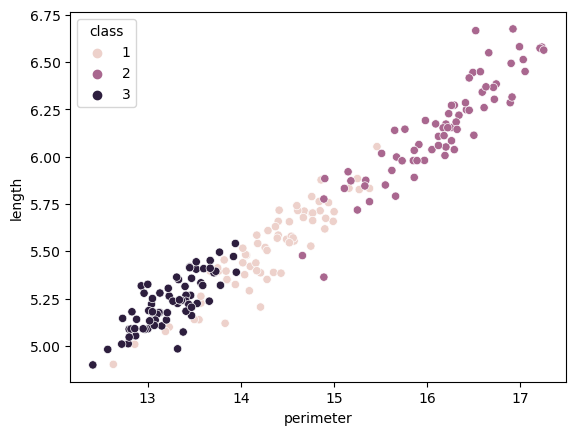

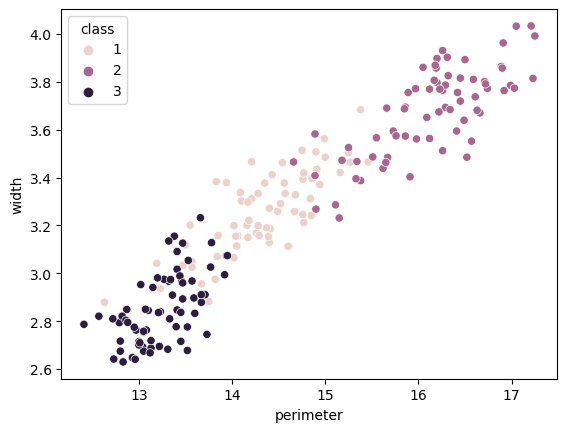

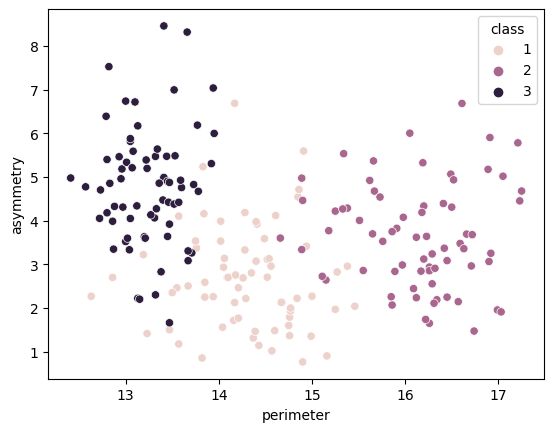

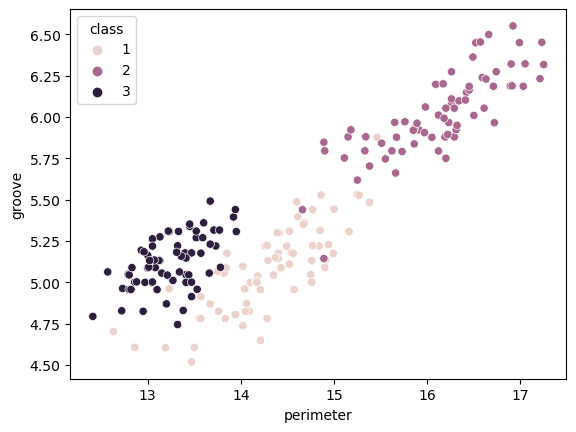

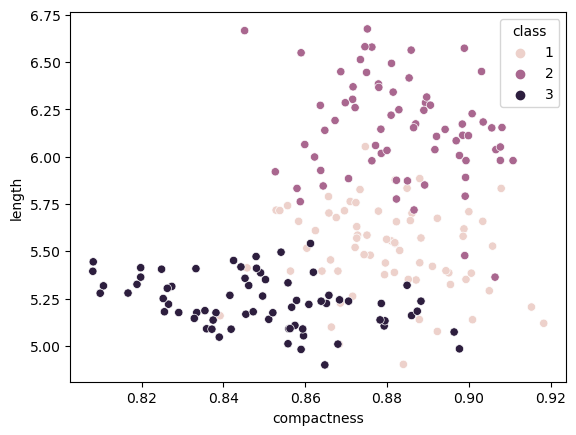

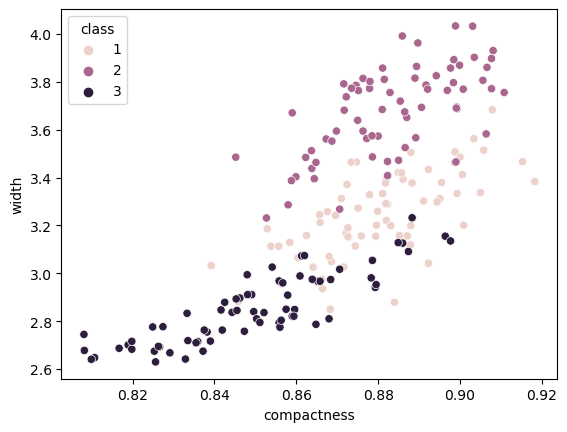

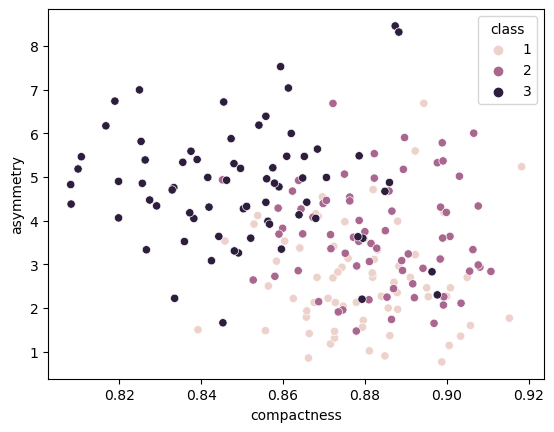

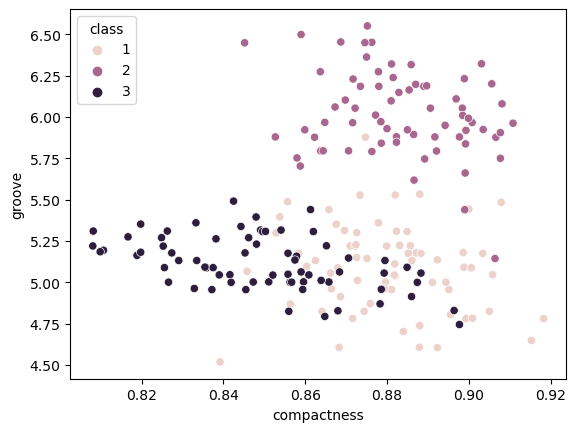

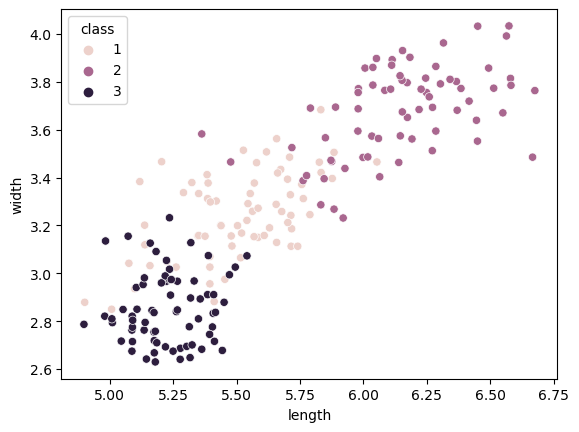

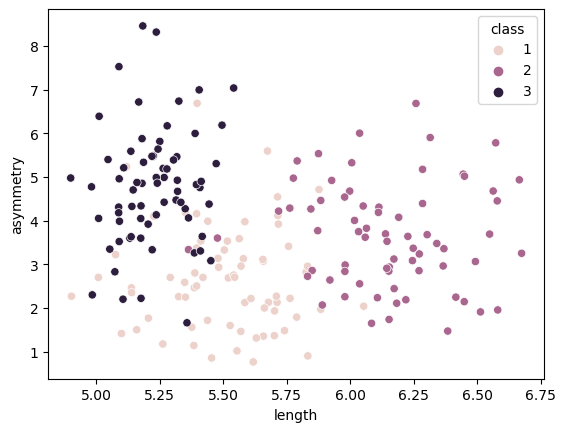

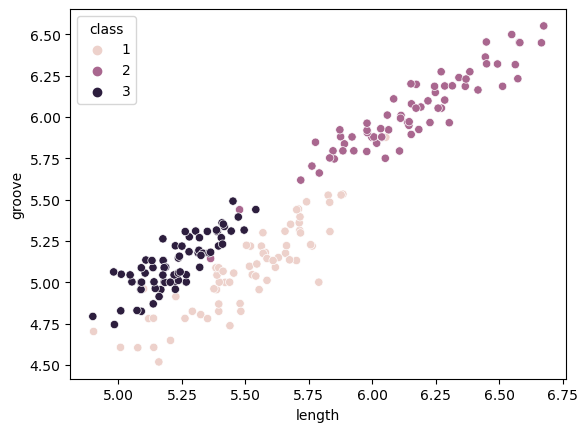

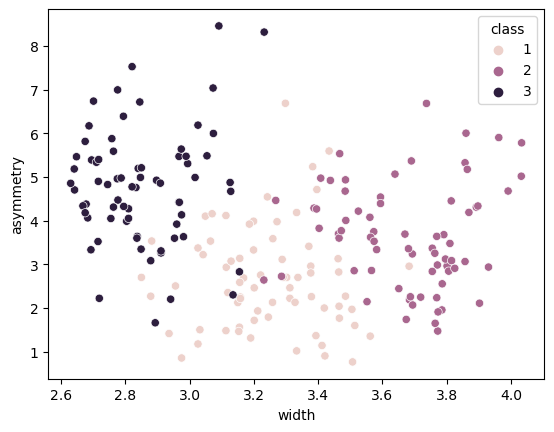

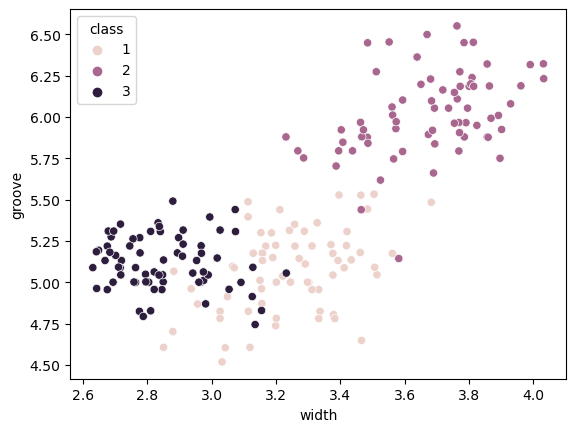

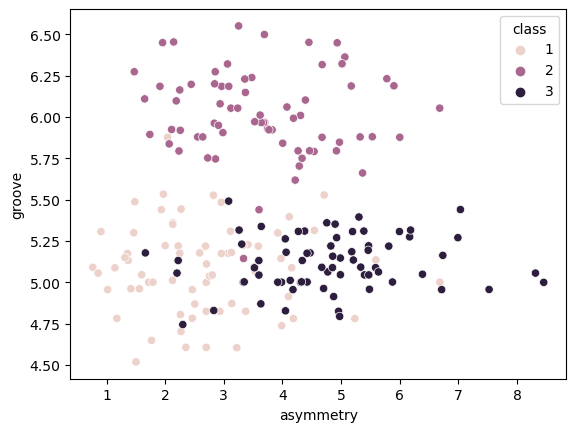

In [19]:
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label,y=y_label,data=df,hue="class")
        plt.show()

# Clustering

In [20]:
from sklearn.cluster import KMeans

In [30]:
x = "compactness"
y= "asymmetry"
X= df[[x,y]].values

In [37]:
kmeans= KMeans(n_clusters=5).fit(X)

c:\Users\Administrator\miniconda3\envs\env312\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
clusters=kmeans.labels_

In [39]:
clusters

array([3, 3, 1, 3, 3, 1, 0, 1, 3, 3, 0, 3, 0, 1, 1, 0, 4, 3, 3, 0, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 0, 3, 1, 0, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 4,
       1, 3, 3, 1, 1, 3, 0, 4, 0, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 0, 3, 3,
       3, 3, 3, 0, 0, 4, 0, 1, 0, 4, 0, 0, 4, 1, 4, 4, 4, 3, 1, 1, 3, 0,
       4, 4, 3, 1, 1, 4, 4, 0, 1, 3, 1, 3, 0, 3, 0, 1, 1, 1, 1, 0, 1, 3,
       3, 0, 3, 2, 4, 3, 0, 1, 0, 1, 4, 0, 0, 1, 1, 0, 0, 3, 3, 4, 1, 1,
       0, 0, 4, 0, 0, 1, 1, 0, 4, 2, 4, 4, 0, 2, 3, 0, 1, 4, 4, 2, 4, 1,
       0, 4, 1, 4, 0, 4, 1, 0, 4, 0, 2, 3, 4, 0, 0, 0, 2, 2, 0, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 2, 0, 4, 0, 2, 4, 4, 0, 0, 4, 0, 4, 4, 4,
       1, 1, 4, 3, 0, 2, 0, 0, 0, 2, 0, 4], dtype=int32)

In [40]:
df["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [41]:
clusters_df= pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns=[x,y,"class"])

[]

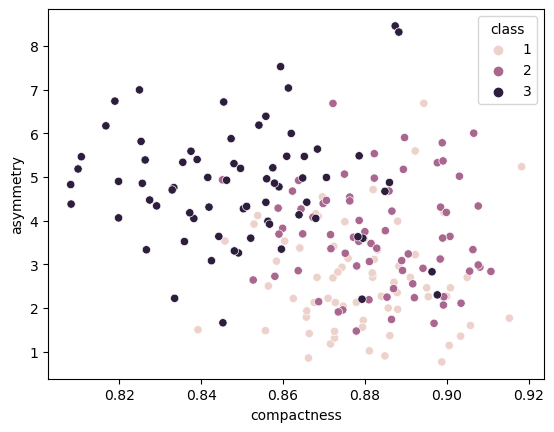

In [42]:
sns.scatterplot(x=x,y=y,hue="class",data=df)
plt.plot()

# Principle Component Analysis

In [43]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=2)
transformed_x=pca.fit_transform(X)

In [49]:
X.shape

(210, 2)

In [50]:
transformed_x.shape

(210, 2)

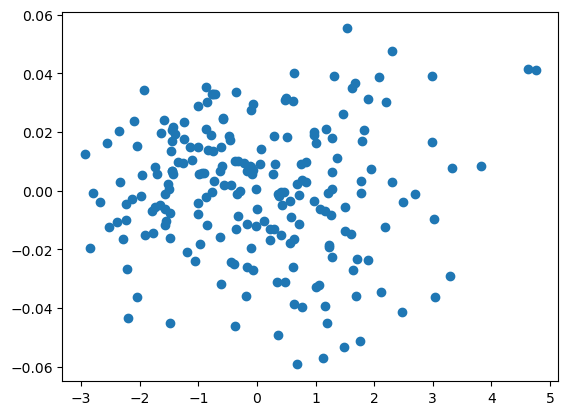

In [51]:
plt.scatter(transformed_x[:,0],transformed_x[:,1])

In [53]:
kmean_pca_df=pd.DataFrame(np.hstack((transformed_x,kmeans.labels_.reshape(-1,1))),columns=["pca1","pca2","class"])

In [54]:
test=[2,4,5]

In [57]:
test

[2, 4, 5]

In [62]:
tet2= np.reshape(test,(-1,1))

In [63]:
tet2

array([[2],
       [4],
       [5]])